# data load

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

pd.set_option('display.max_columns', 35)  ## 생략 없이 한 번에 띄울 피쳐수 = 35
df0 = pd.read_parquet( "../data/df0.parquet" )
df1 = pd.read_parquet( "../data/df1.parquet" )  ### 추가 피쳐: 페이백율, 할인률, 종합혜택률, 구매시각추출, 구매건카운트
df2 = pd.read_parquet( "../data/df2.parquet" )
df3 = pd.read_parquet( "../data/df3.parquet" )  ### 추가 피쳐: 가입시각추출, 상업코드

print(df0.shape, df1.shape, df2.shape, df3.shape, sep=" "*5)
# display(df0.head(2))
# display(df1.head(2))
# display(df2.head(2))
# display(df3.head(2))

(5623810, 14)     (5623810, 23)     (544921, 17)     (544921, 31)


In [189]:
## 지수 표기법 변경
np.set_printoptions(precision=6, suppress=True)
pd.options.display.float_format = '{:.3f}'.format

## 성별

### 유저 별

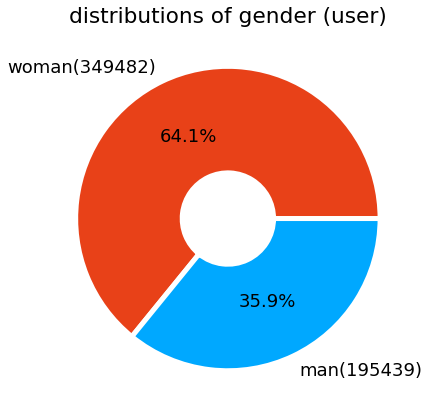

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2525/1783902979.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


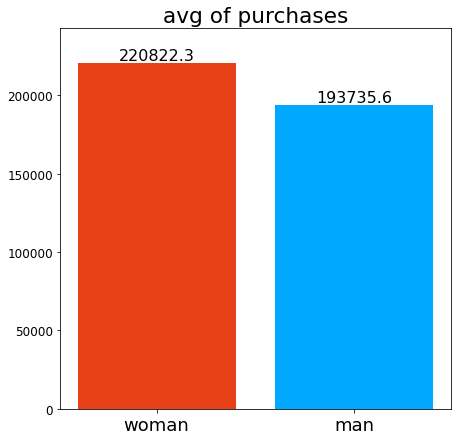

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2525/1783902979.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


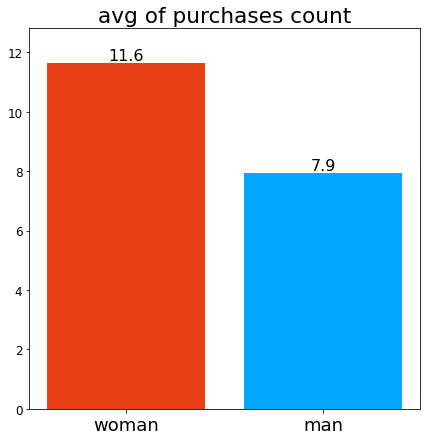

In [190]:
# dist user
plt.figure(figsize=(7,7),facecolor="white")
plt.rc('font', size=18)
man = df2[df2['man'].values==1]['man'].count()
woman = df2[df2['man'].values!=1]['man'].count()
labels = ['woman'+'('+str(woman)+')','man'+'('+str(man)+')']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(df2['man'].value_counts(),labels=labels,autopct='%.1f%%',colors=['#e84118','#00a8ff'],wedgeprops=wedgeprops)
plt.title('distributions of gender (user)')
plt.show()

# avg pre
plt.figure(figsize=(7,7),facecolor="white")
plt.rc('font', size=18)
plt.rc('ytick', labelsize=12) 
b = df2.groupby('man').mean()['pre'].reset_index()
b.iloc[0,0] = 'woman'
b.iloc[1,0] = 'man'
plt.title('avg of purchases')
aaa = plt.bar(b['man'],b['pre'],color=['#e84118','#00a8ff'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
m_h = 0
for rect in aaa:
    height = rect.get_height()
    m_h = max(m_h,height)
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 16)
plt.ylim(0,m_h*1.1)
plt.show()

# avg cnt_b
plt.figure(figsize=(7,7),facecolor="white")
plt.rc('font', size=18)
plt.rc('ytick', labelsize=12) 
b = df2.groupby('man').mean()['cnt_b'].reset_index()
b.iloc[0,0] = 'woman'
b.iloc[1,0] = 'man'
plt.title('avg of purchases count')
aaa = plt.bar(b['man'],b['cnt_b'],color=['#e84118','#00a8ff'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
m_h = 0
for rect in aaa:
    height = rect.get_height()
    m_h = max(m_h,height)
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 16)
plt.ylim(0,m_h*1.1)
plt.show()

### 거래 별

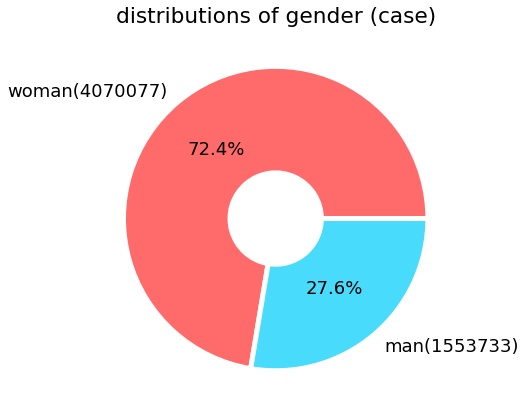

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2525/1749069407.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


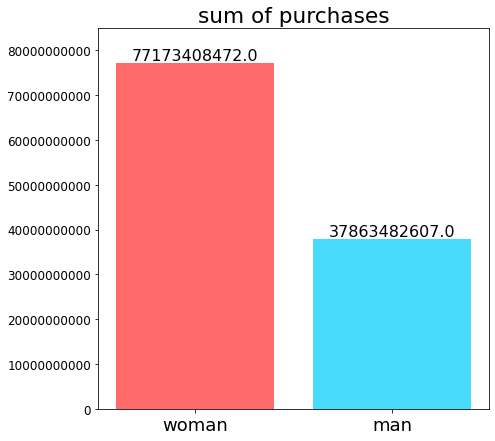

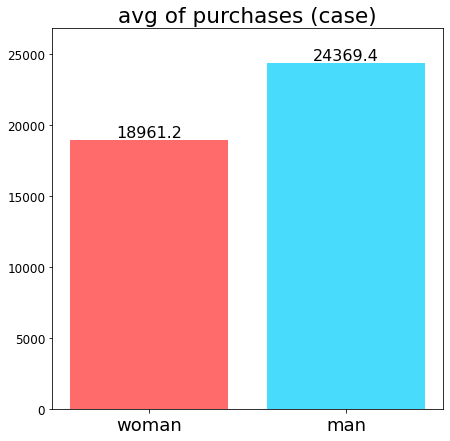

In [191]:
# dist case
plt.figure(figsize=(7,7),facecolor="white")
plt.rc('font', size=18)
man = df0[df0['man'].values==1]['man'].count()
woman = df0[df0['man'].values!=1]['man'].count()
labels = ['woman'+'('+str(woman)+')','man'+'('+str(man)+')']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(df0['man'].value_counts().sort_index(),labels=labels,autopct='%.1f%%',colors=['#ff6b6b','#48dbfb'],wedgeprops=wedgeprops)
plt.title('distributions of gender (case)')
plt.show()


# avg pre
plt.figure(figsize=(7,7),facecolor="white")
plt.rc('font', size=18)
plt.rc('ytick', labelsize=12) 
a = df0.groupby('man').sum()['pre'].reset_index()
a.iloc[0,0] = 'woman'
a.iloc[1,0] = 'man'
plt.title('sum of purchases')
aaa = plt.bar(a['man'],a['pre'],color=['#ff6b6b','#48dbfb'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
m_h = 0
for rect in aaa:
    height = rect.get_height()
    m_h = max(m_h,height)
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 16)
plt.ylim(0,m_h*1.1)
plt.show()

# avg cnt_b
plt.figure(figsize=(7,7),facecolor="white")
plt.rc('font', size=18)
plt.rc('ytick', labelsize=12) 
b = df0.groupby('man').mean()['pre'].reset_index()
b.iloc[0,0] = 'woman'
b.iloc[1,0] = 'man'
plt.title('avg of purchases (case)')
aaa =plt.bar(b['man'],b['pre'],color=['#ff6b6b','#48dbfb'])
current_values = plt.gca().get_yticks()
m_h = 0
for rect in aaa:
    height = rect.get_height()
    m_h = max(m_h,height)
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 16)
plt.ylim(0,m_h*1.1)
plt.show()

## push 알림 설정 여부

### 유저 별

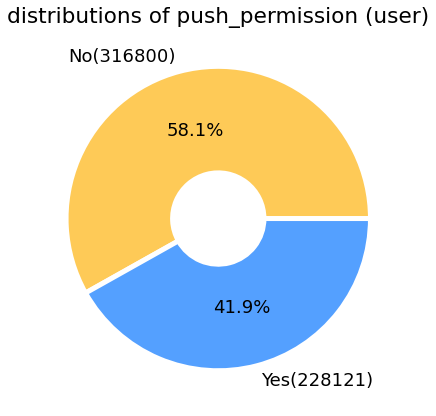

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2525/3020880571.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


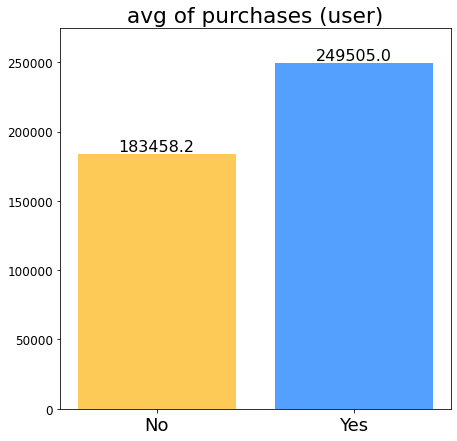

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2525/3020880571.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


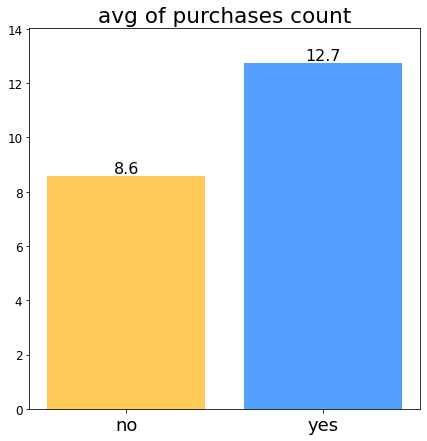

In [192]:
# dist user
plt.figure(figsize=(7,7),facecolor="white")
plt.rc('font', size=18)
yes = df2[df2['push'].values==1]['push'].count()
no = df2[df2['push'].values!=1]['push'].count()
labels = ['No'+'('+str(no)+')','Yes'+'('+str(yes)+')']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(df2['push'].value_counts().sort_index(),labels=labels,autopct='%.1f%%',colors=['#feca57','#54a0ff'],wedgeprops=wedgeprops)
plt.title('distributions of push_permission (user)')
plt.show()

# avg pre
plt.figure(figsize=(7,7),facecolor="white")
plt.rc('font', size=18)
plt.rc('ytick', labelsize=12) 
a = df2.groupby('push').mean()['pre'].reset_index()
a.iloc[0,0] = 'No'
a.iloc[1,0] = 'Yes'
plt.title('avg of purchases (user)')
aaa = plt.bar(a['push'],a['pre'],color=['#feca57','#54a0ff'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
m_h = 0
for rect in aaa:
    height = rect.get_height()
    m_h = max(m_h,height)
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 16)
plt.ylim(0,m_h*1.1)
plt.show()


# avg cnt_b
plt.figure(figsize=(7,7),facecolor="white")
plt.rc('font', size=18)
plt.rc('ytick', labelsize=12) 
b = df2.groupby('push').mean()['cnt_b'].reset_index()
b.iloc[0,0] = 'no'
b.iloc[1,0] = 'yes'
plt.title('avg of purchases count')
aaa = plt.bar(b['push'],b['cnt_b'],color=['#feca57','#54a0ff'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
m_h = 0
for rect in aaa:
    height = rect.get_height()
    m_h = max(m_h,height)
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 16)
plt.ylim(0,m_h*1.1)
plt.show()

### 거래 별

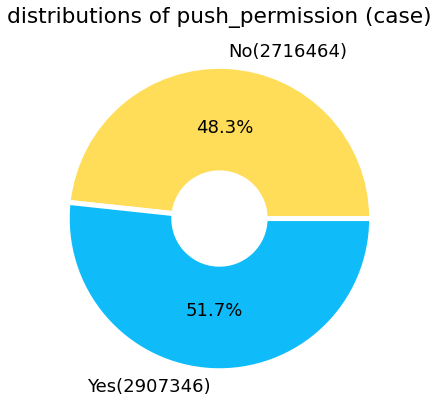

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2525/2239006801.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


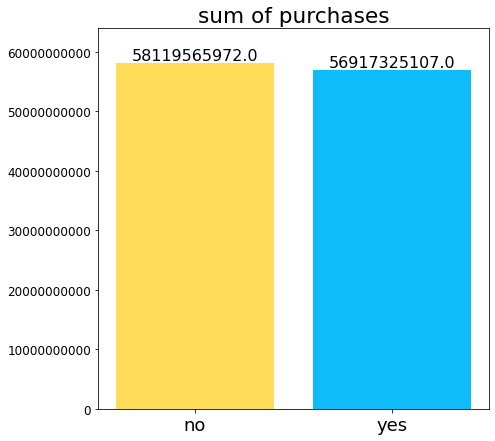

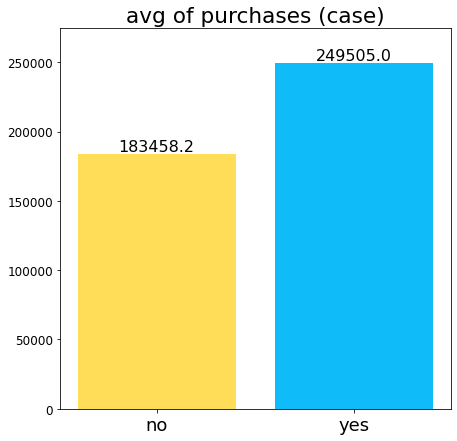

In [193]:
# dist case
plt.figure(figsize=(7,7),facecolor="white")
plt.rc('font', size=18)
yes = df0[df0['push'].values==1]['push'].count()
no = df0[df0['push'].values!=1]['push'].count()
labels = ['No'+'('+str(no)+')','Yes'+'('+str(yes)+')']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(df0['push'].value_counts().sort_index(),labels=labels,autopct='%.1f%%',colors=['#ffdd59','#0fbcf9'],wedgeprops=wedgeprops)
plt.title('distributions of push_permission (case)')
plt.show()

# avg pre
plt.figure(figsize=(7,7),facecolor="white")
plt.rc('font', size=18)
plt.rc('ytick', labelsize=12) 
a = df2.groupby('push').sum()['pre'].reset_index()
a.iloc[0,0] = 'no'
a.iloc[1,0] = 'yes'
plt.title('sum of purchases')
aaa = plt.bar(a['push'],a['pre'],color=['#ffdd59','#0fbcf9'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
m_h = 0
for rect in aaa:
    height = rect.get_height()
    m_h = max(m_h,height)
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 16)
plt.ylim(0,m_h*1.1)
plt.show()

# avg cnt_b
plt.figure(figsize=(7,7),facecolor="white")
plt.rc('font', size=18)
plt.rc('ytick', labelsize=12) 
b = df2.groupby('push').mean()['pre'].reset_index()
b.iloc[0,0] = 'no'
b.iloc[1,0] = 'yes'
plt.title('avg of purchases (case)')
aaa = plt.bar(b['push'],b['pre'],color=['#ffdd59','#0fbcf9'])
current_values = plt.gca().get_yticks()
m_h = 0
for rect in aaa:
    height = rect.get_height()
    m_h = max(m_h,height)
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 16)
plt.ylim(0,m_h*1.1)
plt.show()

## 외국인 여부

### 유저 별

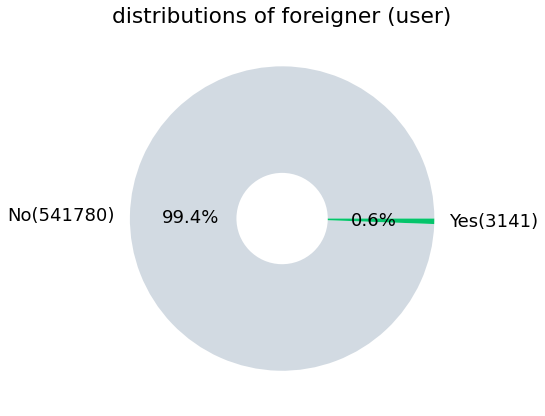

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2525/2002410140.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


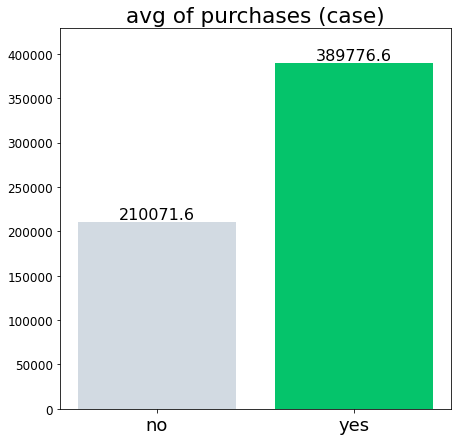

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2525/2002410140.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


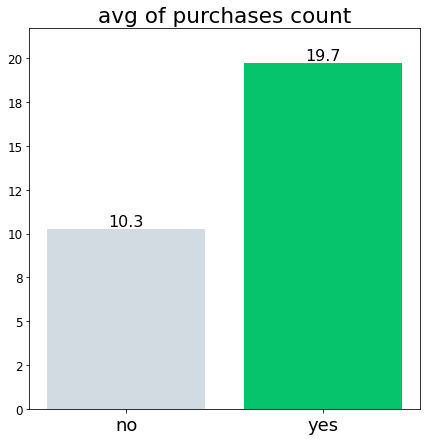

In [194]:
# dist user
plt.figure(figsize=(7,7),facecolor="white")
plt.rc('font', size=18)
yes = df2[df2['frgn'].values==1]['frgn'].count()
no = df2[df2['frgn'].values!=1]['frgn'].count()
labels = ['No'+'('+str(no)+')','Yes'+'('+str(yes)+')']
wedgeprops={'width': 0.7, 'linewidth': 5}
plt.pie(df2['frgn'].value_counts().sort_index(),labels=labels,autopct='%.1f%%',colors=['#d2dae2','#05c46b'],wedgeprops=wedgeprops)
plt.title('distributions of foreigner (user)')
plt.show()

# avg pre
plt.figure(figsize=(7,7),facecolor="white")
plt.rc('font', size=18)
plt.rc('ytick', labelsize=12) 
b = df2.groupby('frgn').mean()['pre'].sort_index().reset_index()
b.iloc[0,0] = 'no'
b.iloc[1,0] = 'yes'
plt.title('avg of purchases (case)')
aaa = plt.bar(b['frgn'],b['pre'],color=['#d2dae2','#05c46b'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
m_h = 0
for rect in aaa:
    height = rect.get_height()
    m_h = max(m_h,height)
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 16)
plt.ylim(0,m_h*1.1)
plt.show()

# avg cnt_b
plt.figure(figsize=(7,7),facecolor="white")
plt.rc('font', size=18)
plt.rc('ytick', labelsize=12) 
b = df2.groupby('frgn').mean()['cnt_b'].reset_index()
b.iloc[0,0] = 'no'
b.iloc[1,0] = 'yes'
plt.title('avg of purchases count')
aaa = plt.bar(b['frgn'],b['cnt_b'],color=['#d2dae2','#05c46b'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
m_h = 0
for rect in aaa:
    height = rect.get_height()
    m_h = max(m_h,height)
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 16)
plt.ylim(0,m_h*1.1)
plt.show()

### 거래 별

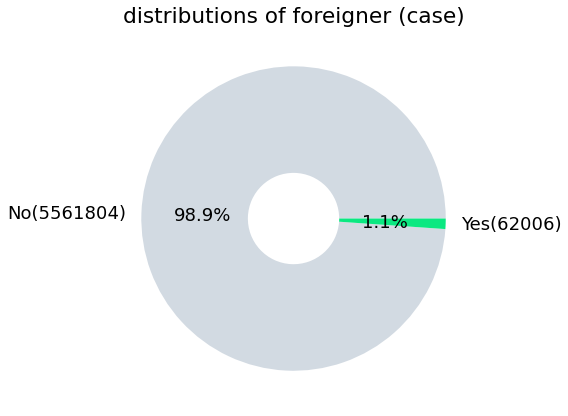

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2525/745690168.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


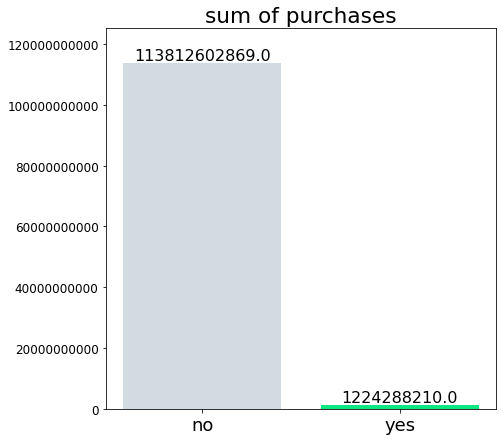

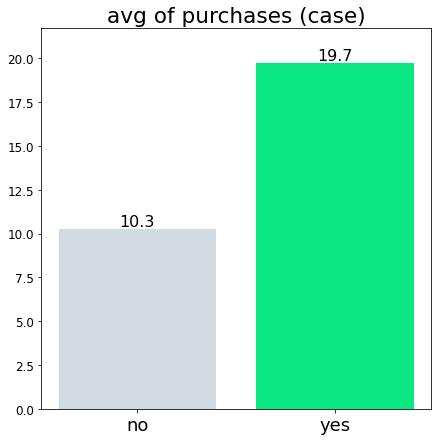

In [195]:
# dist case
plt.figure(figsize=(7,7),facecolor="white")
plt.rc('font', size=18)
yes = df0[df0['frgn'].values==1]['frgn'].count()
no = df0[df0['frgn'].values!=1]['frgn'].count()
labels = ['No'+'('+str(no)+')','Yes'+'('+str(yes)+')']
wedgeprops={'width': 0.7, 'linewidth': 5}
plt.pie(df0['frgn'].value_counts().sort_index(),labels=labels,autopct='%.1f%%',colors=['#d2dae2','#0be881'],wedgeprops=wedgeprops)
plt.title('distributions of foreigner (case)')
plt.show()

# avg pre
plt.figure(figsize=(7,7),facecolor="white")
plt.rc('font', size=18)
plt.rc('ytick', labelsize=12) 
a = df2.groupby('frgn').sum()['pre'].reset_index()
a.iloc[0,0] = 'no'
a.iloc[1,0] = 'yes'
plt.title('sum of purchases')
aaa = plt.bar(a['frgn'],a['pre'],color=['#d2dae2','#0be881'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
m_h = 0
for rect in aaa:
    height = rect.get_height()
    m_h = max(m_h,height)
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 16)
plt.ylim(0,m_h*1.1)
plt.show()

# avg cnt_b
plt.figure(figsize=(7,7),facecolor="white")
plt.rc('font', size=18)
plt.rc('ytick', labelsize=12) 
b = df2.groupby('frgn').mean()['cnt_b'].reset_index()
b.iloc[0,0] = 'no'
b.iloc[1,0] = 'yes'
plt.title('avg of purchases (case)')
aaa = plt.bar(b['frgn'],b['cnt_b'],color=['#d2dae2','#0be881'])
current_values = plt.gca().get_yticks()
m_h = 0
for rect in aaa:
    height = rect.get_height()
    m_h = max(m_h,height)
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 16)
plt.ylim(0,m_h*1.1)
plt.show()

## 연령대별

/Users/luci031/miniforge3/envs/yds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

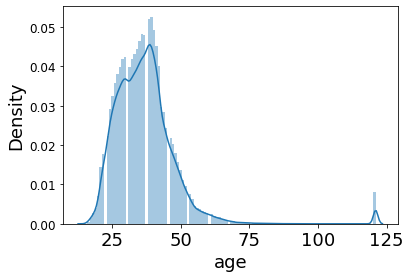

In [196]:
sns.distplot(df2['age'],bins=120)

In [197]:
df2[df2['age']==93]

,id,age,man,push,frgn,birth,sign,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
21312,21313,93,1,1,0,1928-01-21,2019-06-17 21:08:41.419,1228223,1172975,15494,55248,70742,1.300,4.500,5.800,1,72


/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2525/3425185679.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2525/3425185679.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


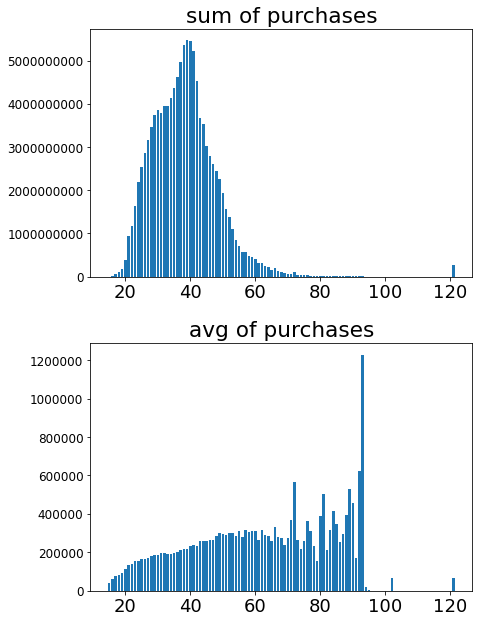

In [198]:
plt.figure(figsize=(7,9),facecolor="white")
plt.subplot(2,1,1)
plt.title("sum of purchases")
plt.bar(df2.groupby('age').sum()['pre'].index,df2.groupby('age').sum()['pre'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.subplot(2,1,2)
plt.title("avg of purchases")
plt.bar(df2.groupby('age').mean()['pre'].index,df2.groupby('age').mean()['pre'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.tight_layout()
plt.show()

In [199]:
def change(x):
    if 8 <= x < 13: return str(2019)+'-'+str(x)
    else: return str(2020)+'-'+str(x)

In [200]:
c

,buy_m,pre
0,2019-8,16872.774
1,2019-9,20111.609
2,2019-10,26335.962
3,2019-11,20172.269
4,2019-12,24125.856
5,2020-1,20783.212
6,2020-2,17182.337
7,2020-3,18033.728


/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2525/3841641328.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  c = bb.iloc[3:,:].append(bb.iloc[:3,:]).reset_index()
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2525/3841641328.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


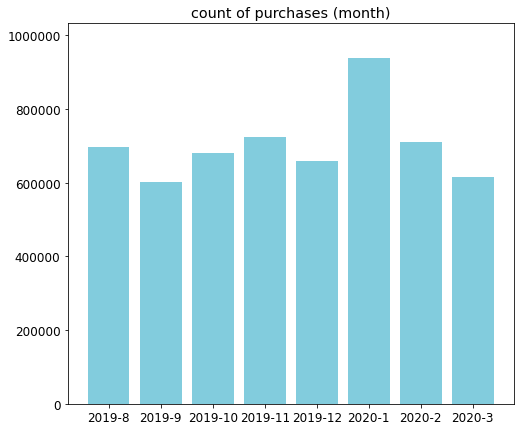

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2525/3841641328.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  c = bb.iloc[3:,:].append(bb.iloc[:3,:]).reset_index()
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2525/3841641328.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


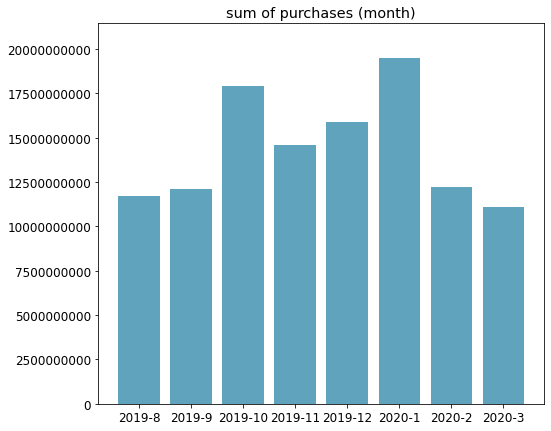

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2525/3841641328.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  c = bb.iloc[3:,:].append(bb.iloc[:3,:]).reset_index()
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2525/3841641328.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


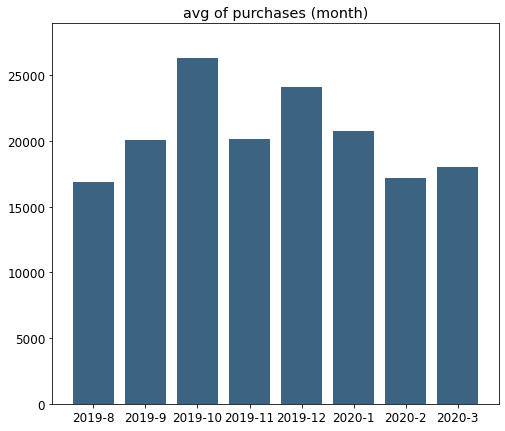

In [201]:
# buy_m cnt
bb = df1.groupby('buy_m').count()['pre'].to_frame()
c = bb.iloc[3:,:].append(bb.iloc[:3,:]).reset_index()
c['buy_m'] = c['buy_m'].apply(change)

plt.figure(figsize=(8,7),facecolor="white")
plt.rc('font', size=12)
plt.rc('ytick', labelsize=12) 
plt.title('count of purchases (month)')
aaa = plt.bar(c['buy_m'],c['pre'],color='#82ccdd')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
m_h = 0
for rect in aaa:
    height = rect.get_height()
    m_h = max(m_h,height)
plt.ylim(0,m_h*1.1)
plt.show()
# buy_m sum
bb = df1.groupby('buy_m').sum()['pre'].to_frame()
c = bb.iloc[3:,:].append(bb.iloc[:3,:]).reset_index()
c['buy_m'] = c['buy_m'].apply(change)

plt.figure(figsize=(8,7),facecolor="white")
plt.rc('font', size=12)
plt.rc('ytick', labelsize=12) 
plt.title('sum of purchases (month)')
aaa = plt.bar(c['buy_m'],c['pre'],color='#60a3bc')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
m_h = 0
for rect in aaa:
    height = rect.get_height()
    m_h = max(m_h,height)
plt.ylim(0,m_h*1.1)
plt.show()

# buy_m avg
bb = df1.groupby('buy_m').mean()['pre'].to_frame()
c = bb.iloc[3:,:].append(bb.iloc[:3,:]).reset_index()
c['buy_m'] = c['buy_m'].apply(change)

plt.figure(figsize=(8,7),facecolor="white")
plt.rc('font', size=12)
plt.rc('ytick', labelsize=12) 
plt.title('avg of purchases (month)')
aaa = plt.bar(c['buy_m'],c['pre'],color='#3c6382')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
m_h = 0
for rect in aaa:
    height = rect.get_height()
    m_h = max(m_h,height)
plt.ylim(0,m_h*1.1)
plt.show()

## 활성 유저

In [228]:
df_au = df1

In [229]:
df_au[['buy_8','buy_9','buy_10','buy_11','buy_12','buy_1','buy_2','buy_3']] = 0
df_au.loc[df_au['buy_m']==8,'buy_8'] = 1
df_au.loc[df_au['buy_m']==9,'buy_9'] = 1
df_au.loc[df_au['buy_m']==10,'buy_10'] = 1
df_au.loc[df_au['buy_m']==11,'buy_11'] = 1
df_au.loc[df_au['buy_m']==12,'buy_12'] = 1
df_au.loc[df_au['buy_m']==1,'buy_1'] = 1
df_au.loc[df_au['buy_m']==2,'buy_2'] = 1
df_au.loc[df_au['buy_m']==3,'buy_3'] = 1
a = df_au.groupby('id').sum()
cnt8 = a[a['buy_8']==0]['push'].count()
cnt9 = a[a['buy_9']==0]['push'].count()
cnt10 = a[a['buy_10']==0]['push'].count()
cnt11 = a[a['buy_11']==0]['push'].count()
cnt12 = a[a['buy_12']==0]['push'].count()
cnt1 = a[a['buy_1']==0]['push'].count()
cnt2 = a[a['buy_2']==0]['push'].count()
cnt3 = a[a['buy_3']==0]['push'].count()

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2525/1070241392.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


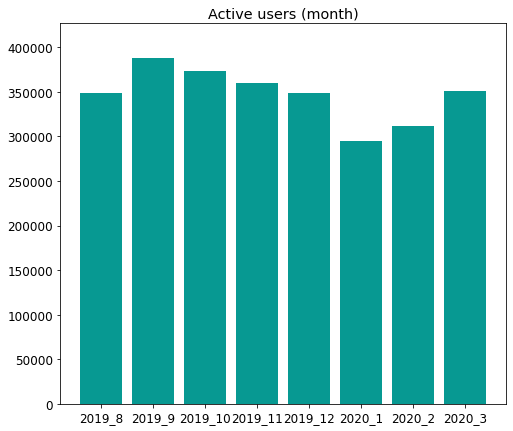

In [237]:
plt.figure(figsize=(8,7),facecolor="white")
plt.rc('font', size=12)
plt.rc('ytick', labelsize=12) 
plt.title('Active users (month)')
xs = ['2019_8','2019_9','2019_10','2019_11','2019_12','2020_1','2020_2','2020_3']
lst = [cnt8,cnt9,cnt10,cnt11,cnt12,cnt1,cnt2,cnt3]
aaa = plt.bar(xs,lst,color='#079992')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
m_h = 0
for rect in aaa:
    height = rect.get_height()
    m_h = max(m_h,height)
plt.ylim(0,m_h*1.1)
plt.show()

## 구매 횟수별 (once and more)

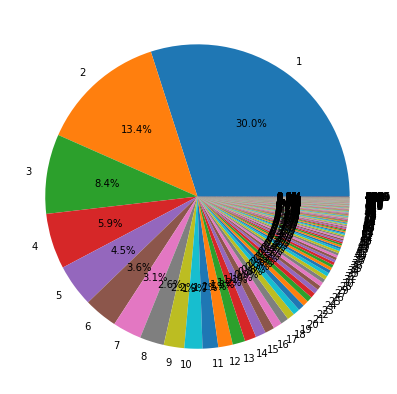

In [11]:
plt.figure(figsize=(7,7),facecolor="white")
labels = df2['cnt_b'].value_counts().index.to_list()
plt.pie(df2['cnt_b'].value_counts(),labels=labels,autopct='%.1f%%')
plt.show()

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2956/1445558188.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2956/1445558188.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


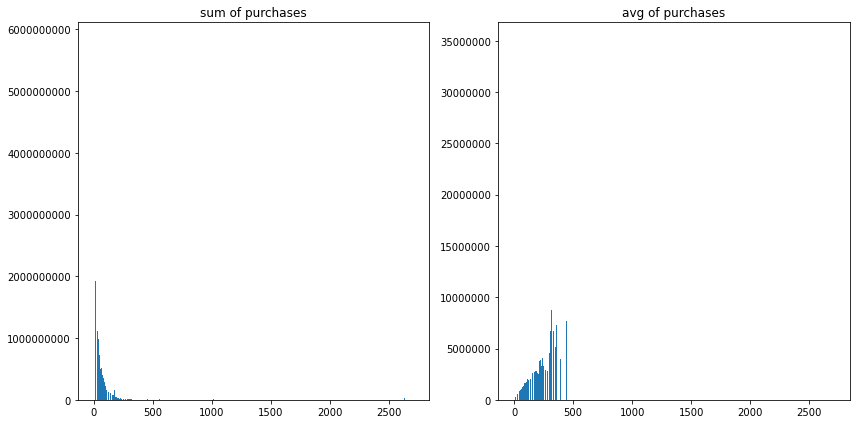

In [12]:
plt.figure(figsize=(12,6),facecolor="white")
plt.subplot(1,2,1)
plt.title("sum of purchases")
plt.bar(df2.groupby('cnt_b').sum()['pre'].index,df2.groupby('cnt_b').sum()['pre'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.subplot(1,2,2)
plt.title("avg of purchases")
plt.bar(df2.groupby('cnt_b').mean()['pre'].index,df2.groupby('cnt_b').mean()['pre'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.tight_layout()
plt.show()

In [13]:
#눈에 띄는 지점 기준으로 나누기
print('1회')
display(df2[df2['cnt_b']<2].describe())
print('2~3회')
display(df2[(df2['cnt_b']>=2) & (df2['cnt_b']<4)].describe())
print('4~10회')
display(df2[(df2['cnt_b']>=4) & (df2['cnt_b']<11)].describe())
print('11회~')
display(df2[df2['cnt_b']>=11].describe())

1회


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,163227.000,163227.000,163227.000,163227.000,163227.000,163227.000,163227.000,163227.000,163227.000,163227.000,163227.000,163227.000,163227.000,163227.000,163227.000
mean,272553.842,36.884,0.400,0.374,0.004,35677.349,32686.630,102.533,2990.719,3093.252,0.240,17.305,17.545,1.000,1.000
std,157021.312,14.544,0.490,0.484,0.064,82129.937,80606.849,1042.672,2952.574,3041.888,0.871,18.598,18.443,0.000,0.000
min,3.000,15.000,0.000,0.000,0.000,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,136992.000,28.000,0.000,0.000,0.000,10560.000,7900.000,0.000,1501.000,1501.000,0.000,5.100,5.300,1.000,1.000
50%,272484.000,35.000,0.000,0.000,0.000,16500.000,13900.000,0.000,2000.000,2000.000,0.000,11.200,11.300,1.000,1.000
75%,408381.000,41.000,1.000,1.000,0.000,29800.000,27300.000,0.000,5000.000,5000.000,0.000,22.700,22.800,1.000,1.000
max,544913.000,121.000,1.000,1.000,1.000,1990950.000,1985950.000,94772.000,58000.000,94772.000,5.000,100.000,100.000,1.000,1.000


2~3회


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,119180.000,119180.000,119180.000,119180.000,119180.000,119180.000,119180.000,119180.000,119180.000,119180.000,119180.000,119180.000,119180.000,119180.000,119180.000
mean,272735.881,36.328,0.392,0.393,0.005,70849.770,65590.136,258.768,5259.634,5518.401,0.402,12.497,12.899,1.000,2.386
std,157321.855,10.735,0.488,0.488,0.067,147277.241,143732.805,1296.826,5303.438,5342.903,0.921,10.218,10.014,0.000,0.487
min,1.000,15.000,0.000,0.000,0.000,1000.000,500.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2.000
25%,136358.000,29.000,0.000,0.000,0.000,25470.000,21400.000,0.000,2491.000,3000.000,0.000,5.700,6.300,1.000,2.000
50%,272672.500,36.000,0.000,0.000,0.000,38750.000,34340.000,0.000,4000.000,4501.000,0.000,10.200,10.500,1.000,2.000
75%,408999.000,41.000,1.000,1.000,0.000,64920.000,59700.000,0.000,6800.000,7000.000,0.000,16.500,16.800,1.000,3.000
max,544917.000,121.000,1.000,1.000,1.000,2876400.000,2815200.000,92856.000,508000.000,508000.000,5.000,92.100,92.100,1.000,3.000


4~10회


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,129180.000,129180.000,129180.000,129180.000,129180.000,129180.000,129180.000,129180.000,129180.000,129180.000,129180.000,129180.000,129180.000,129180.000,129180.000
mean,272613.534,36.395,0.360,0.416,0.005,149083.965,138359.556,703.493,10724.410,11427.903,0.530,10.111,10.641,1.000,6.257
std,157740.499,9.719,0.480,0.493,0.073,251964.142,245267.457,2037.848,8862.680,8847.334,0.915,6.967,6.728,0.000,1.950
min,4.000,15.000,0.000,0.000,0.000,4639.000,4235.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,4.000
25%,135707.500,30.000,0.000,0.000,0.000,65512.250,57580.000,0.000,6000.000,6850.750,0.000,5.600,6.300,1.000,5.000
50%,272833.500,36.000,0.000,0.000,0.000,100080.000,90699.000,0.000,9190.000,9954.500,0.000,8.700,9.100,1.000,6.000
75%,409635.750,41.000,1.000,1.000,0.000,156542.500,145300.000,738.000,13180.250,13850.000,0.700,12.700,12.900,1.000,8.000
max,544921.000,121.000,1.000,1.000,1.000,9492800.000,9158600.000,99651.000,334200.000,335020.000,5.000,68.800,68.800,1.000,10.000


11회~


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,133334.000,133334.000,133334.000,133334.000,133334.000,133334.000,133334.000,133334.000,133334.000,133334.000,133334.000,133334.000,133334.000,133334.000,133334.000
mean,271953.860,37.654,0.277,0.498,0.009,611328.260,570129.613,4135.574,41198.647,45334.222,0.656,8.071,8.727,1.000,32.759
std,157216.178,9.673,0.448,0.500,0.096,963320.182,928930.276,8690.822,42167.615,45763.250,0.833,4.154,3.934,0.000,32.875
min,23.000,16.000,0.000,0.000,0.000,19761.000,13922.000,0.000,0.000,746.000,0.000,0.000,0.400,1.000,11.000
25%,135671.750,31.000,0.000,0.000,0.000,239080.000,218289.250,117.000,18750.000,20771.000,0.000,5.500,6.400,1.000,15.000
50%,271832.000,37.000,0.000,0.000,0.000,397057.000,367579.500,1500.000,29506.500,32037.000,0.400,7.500,8.000,1.000,22.000
75%,407876.250,43.000,1.000,1.000,0.000,706145.500,657878.750,4554.000,49527.000,53869.750,0.900,9.700,10.100,1.000,38.000
max,544919.000,121.000,1.000,1.000,1.000,115005350.000,112273800.000,851803.000,2731550.000,2731550.000,5.000,52.600,52.600,1.000,2705.000


## 구매 금액별 (heavy and light)

In [14]:
df2['pre'].describe()

count      544921.000
mean       211107.465
std        550003.100
min           500.000
25%         23800.000
50%         67300.000
75%        206356.000
max     115005350.000
Name: pre, dtype: float64

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2956/2437683103.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values1])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2956/2437683103.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values2])


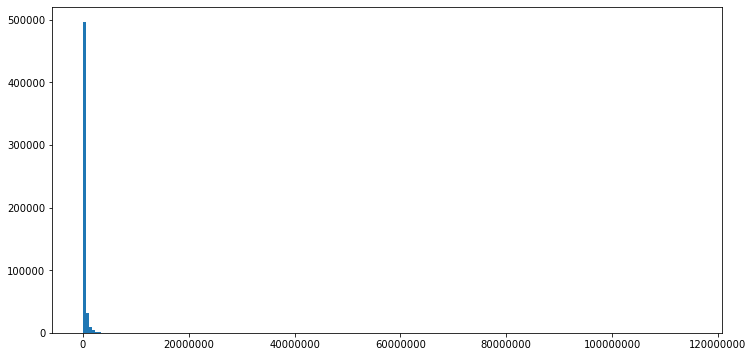

In [15]:
plt.figure(figsize=(12,6),facecolor="white")
plt.hist(df2['pre'],bins=200)
current_values1 = plt.gca().get_yticks()
current_values2 = plt.gca().get_xticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values1])
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values2])
plt.show()

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2956/3244094015.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values1])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2956/3244094015.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values2])


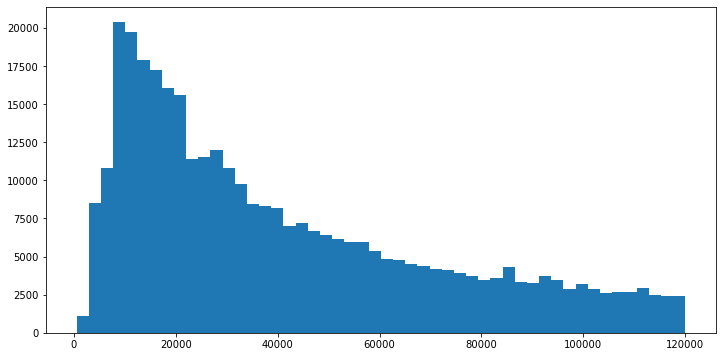

In [16]:
# 12만원 이하 금액들 분포 살피기
plt.figure(figsize=(12,6),facecolor="white")
plt.hist(df2[df2['pre']<=120000]['pre'],bins=50)
current_values1 = plt.gca().get_yticks()
current_values2 = plt.gca().get_xticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values1])
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values2])
plt.show()

In [18]:
#눈에 띄는 지점 기준으로 나누기
print('~2만원')
display(df2[df2['post']<20000].describe())
print('2~8만원')
display(df2[(df2['pre']>=20000) & (df2['pre']<80000)].describe())
print('8~20만원')
display(df2[(df2['pre']>=80000) & (df2['pre']<200000)].describe())
print('20만원~')
display(df2[df2['post']>=200000].describe())

~2만원


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,135603.000,135603.000,135603.000,135603.000,135603.000,135603.000,135603.000,135603.000,135603.000,135603.000,135603.000,135603.000,135603.000,135603.000,135603.000
mean,272305.827,37.341,0.402,0.372,0.004,13731.900,10831.171,28.656,2900.729,2929.385,0.223,22.800,23.023,1.000,1.272
std,157302.277,14.552,0.490,0.483,0.062,5668.272,5152.521,108.777,2295.298,2279.868,0.800,19.489,19.342,0.000,0.611
min,1.000,15.000,0.000,0.000,0.000,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,136338.000,29.000,0.000,0.000,0.000,9800.000,7120.000,0.000,1501.000,1501.000,0.000,11.100,11.100,1.000,1.000
50%,272101.000,36.000,0.000,0.000,0.000,13400.000,10500.000,0.000,2000.000,2000.000,0.000,18.300,18.300,1.000,1.000
75%,408686.500,41.000,1.000,1.000,0.000,17850.000,15120.000,0.000,4700.000,4726.500,0.000,31.200,31.200,1.000,1.000
max,544913.000,121.000,1.000,1.000,1.000,41900.000,19999.000,1710.000,23000.000,23000.000,5.000,100.000,100.000,1.000,11.000


2~8만원


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,177456.000,177456.000,177456.000,177456.000,177456.000,177456.000,177456.000,177456.000,177456.000,177456.000,177456.000,177456.000,177456.000,177456.000,177456.000
mean,272531.428,36.449,0.362,0.399,0.005,43496.798,38509.280,181.939,4987.518,5169.457,0.396,12.168,12.564,1.000,2.764
std,157405.773,11.393,0.481,0.490,0.070,16758.689,15873.865,440.958,3440.716,3371.465,0.913,8.168,7.928,0.000,1.834
min,1.000,15.000,0.000,0.000,0.000,20000.000,7400.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,136368.000,29.000,0.000,0.000,0.000,28840.000,25000.000,0.000,2000.000,2620.000,0.000,6.700,7.100,1.000,1.000
50%,272419.500,36.000,0.000,0.000,0.000,40300.000,35600.000,0.000,5000.000,5000.000,0.000,10.700,11.000,1.000,2.000
75%,409020.750,41.000,1.000,1.000,0.000,56400.000,50540.000,0.000,6700.000,6870.000,0.000,16.400,16.600,1.000,4.000
max,544917.000,121.000,1.000,1.000,1.000,79995.000,79930.000,3998.000,36000.000,36000.000,5.000,68.800,68.800,1.000,25.000


8~20만원


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,111597.000,111597.000,111597.000,111597.000,111597.000,111597.000,111597.000,111597.000,111597.000,111597.000,111597.000,111597.000,111597.000,111597.000,111597.000
mean,272669.214,36.058,0.361,0.418,0.005,129308.907,118649.690,689.555,10659.217,11348.773,0.528,8.372,8.900,1.000,7.067
std,157561.266,9.987,0.480,0.493,0.072,34106.531,32553.120,1266.648,6685.537,6470.069,0.939,4.981,4.749,0.000,4.583
min,8.000,15.000,0.000,0.000,0.000,80000.000,42500.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,135691.000,29.000,0.000,0.000,0.000,99000.000,90500.000,0.000,6000.000,6961.000,0.000,4.900,5.700,1.000,4.000
50%,272908.000,36.000,0.000,0.000,0.000,124680.000,113800.000,0.000,10000.000,10227.000,0.000,7.900,8.300,1.000,6.000
75%,409317.000,41.000,1.000,1.000,0.000,156001.000,143600.000,893.000,14000.000,14460.000,0.700,10.800,11.100,1.000,10.000
max,544911.000,121.000,1.000,1.000,1.000,199993.000,199760.000,9952.000,74000.000,75603.000,5.000,50.600,50.600,1.000,51.000


20만원~


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,131312.000,131312.000,131312.000,131312.000,131312.000,131312.000,131312.000,131312.000,131312.000,131312.000,131312.000,131312.000,131312.000,131312.000,131312.000
mean,272270.102,37.524,0.315,0.485,0.009,683529.782,641952.702,4344.657,41577.080,45921.737,0.634,6.579,7.213,1.000,31.225
std,156965.818,9.799,0.465,0.500,0.095,975725.614,941634.438,8968.844,42864.014,46330.978,0.862,3.079,2.888,0.000,34.214
min,4.000,16.000,0.000,0.000,0.000,200050.000,200000.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,136373.000,30.000,0.000,0.000,0.000,301637.500,280030.750,0.000,18450.000,20920.000,0.000,4.400,5.300,1.000,12.000
50%,272317.500,37.000,0.000,0.000,0.000,450220.000,419370.500,1551.000,30247.000,32984.000,0.300,6.500,7.100,1.000,22.000
75%,407766.250,43.000,1.000,1.000,0.000,775887.750,726280.500,4971.000,50968.500,55204.000,0.900,8.400,8.800,1.000,39.000
max,544921.000,121.000,1.000,1.000,1.000,115005350.000,112273800.000,851803.000,2731550.000,2731550.000,5.000,43.300,48.100,1.000,2705.000


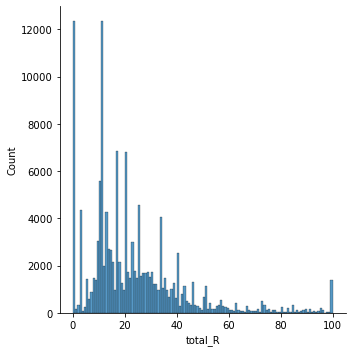

In [22]:

sns.displot(df2[df2['post']<20000]['total_R'],bins=120)

## 할인율

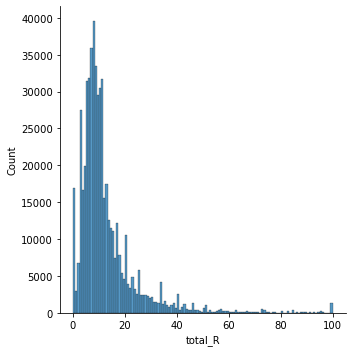

In [170]:
sns.displot(df2['total_R'],bins=120)

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2479/671264884.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2479/671264884.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


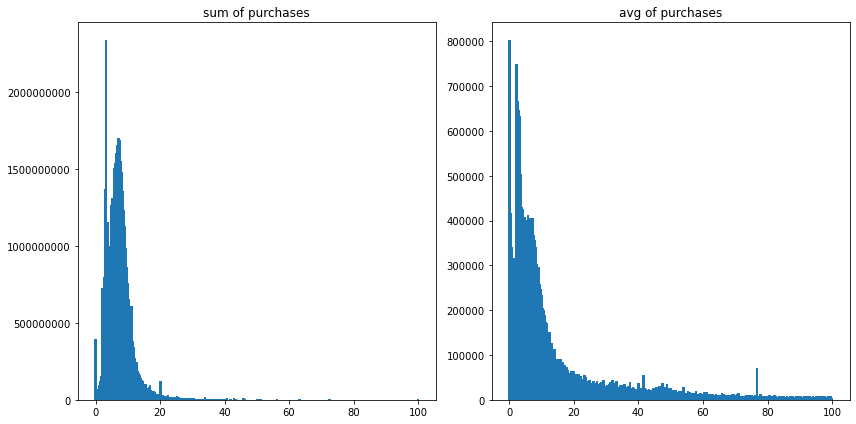

In [171]:
plt.figure(figsize=(12,6),facecolor="white")
plt.subplot(1,2,1)
plt.title("sum of purchases")
plt.bar(df2.groupby('total_R').sum()['pre'].index,df2.groupby('total_R').sum()['pre'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.subplot(1,2,2)
plt.title("avg of purchases")
plt.bar(df2.groupby('total_R').mean()['pre'].index,df2.groupby('total_R').mean()['pre'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.tight_layout()
plt.show()

In [172]:
df2['total_R'].value_counts()

0.000     15865
11.100    13200
3.000     11493
3.200      7497
10.100     5705
          ...  
96.100        1
92.300        1
98.100        1
90.300        1
99.400        1
Name: total_R, Length: 951, dtype: int64

In [173]:
#눈에 띄는 지점 기준으로 나누기
print('~5%')
display(df2[df2['total_R']<5].describe())
print('5~9%')
display(df2[(df2['total_R']>=5) & (df2['total_R']<9)].describe())
print('9~15%')
display(df2[(df2['total_R']>=9) & (df2['total_R']<15)].describe())
print('15%~')
display(df2[df2['total_R']>=15].describe())

~5%


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,90688.000,90688.000,90688.000,90688.000,90688.000,90688.000,90688.000,90688.000,90688.000,90688.000,90688.000,90688.000,90688.000,90688.000,90688.000
mean,272848.112,35.308,0.422,0.403,0.007,307522.749,298638.536,1640.636,8884.213,10524.849,0.762,2.050,2.811,1.000,6.216
std,157113.911,11.018,0.494,0.491,0.085,1063422.031,1034308.187,6023.597,30538.256,32356.960,1.130,1.677,1.561,0.000,20.568
min,4.000,15.000,0.000,0.000,0.000,500.000,500.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,136714.750,28.000,0.000,0.000,0.000,28567.500,28000.000,0.000,0.000,717.000,0.000,0.000,2.100,1.000,1.000
50%,272834.500,34.000,0.000,0.000,0.000,93500.000,91000.000,0.000,2000.000,3000.000,0.000,2.300,3.200,1.000,2.000
75%,408816.500,41.000,1.000,1.000,0.000,275400.000,269200.000,1194.000,7350.000,9350.000,1.400,3.500,4.000,1.000,6.000
max,544909.000,121.000,1.000,1.000,1.000,115005350.000,112273800.000,851803.000,2731550.000,2731550.000,4.900,4.900,4.900,1.000,2705.000


5~9%


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,164562.000,164562.000,164562.000,164562.000,164562.000,164562.000,164562.000,164562.000,164562.000,164562.000,164562.000,164562.000,164562.000,164562.000,164562.000
mean,272452.462,36.595,0.297,0.463,0.008,351238.979,329378.067,2536.183,21860.912,24397.095,0.639,6.391,7.030,1.000,17.695
std,157134.836,10.061,0.457,0.499,0.087,505852.925,475971.935,6626.947,31149.804,34857.378,0.993,1.631,1.124,0.000,26.621
min,15.000,15.000,0.000,0.000,0.000,1400.000,1400.000,0.000,0.000,70.000,0.000,0.000,5.000,1.000,1.000
25%,136451.500,29.000,0.000,0.000,0.000,69310.000,64800.000,0.000,4000.000,5000.000,0.000,5.400,6.100,1.000,3.000
50%,272402.000,36.000,0.000,0.000,0.000,174300.000,163070.500,465.000,10900.000,12000.000,0.200,6.600,7.100,1.000,8.000
75%,408436.500,42.000,1.000,1.000,0.000,425935.000,398577.250,2357.000,26857.000,29745.750,0.900,7.600,8.000,1.000,21.000
max,544920.000,121.000,1.000,1.000,1.000,22250915.000,21100913.000,249438.000,1150002.000,1330657.000,5.000,8.900,8.900,1.000,487.000


9~15%


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,156457.000,156457.000,156457.000,156457.000,156457.000,156457.000,156457.000,156457.000,156457.000,156457.000,156457.000,156457.000,156457.000,156457.000,156457.000
mean,272325.294,37.190,0.329,0.427,0.005,155839.040,139732.542,688.360,16106.498,16794.858,0.305,11.024,11.329,1.000,10.816
std,157476.498,11.042,0.470,0.495,0.070,266674.796,241346.395,2922.164,25750.535,27476.758,0.722,1.805,1.618,0.000,19.328
min,6.000,16.000,0.000,0.000,0.000,900.000,800.000,0.000,100.000,100.000,0.000,4.000,9.000,1.000,1.000
25%,135768.000,30.000,0.000,0.000,0.000,29700.000,26148.000,0.000,3396.000,3500.000,0.000,9.700,10.000,1.000,2.000
50%,272419.000,37.000,0.000,0.000,0.000,68802.000,60927.000,0.000,7740.000,8000.000,0.000,11.000,11.100,1.000,4.000
75%,408860.000,42.000,1.000,1.000,0.000,166890.000,148939.000,315.000,17836.000,18365.000,0.200,12.300,12.600,1.000,11.000
max,544921.000,121.000,1.000,1.000,1.000,8063204.000,7434512.000,114411.000,628692.000,727749.000,5.000,14.900,14.900,1.000,430.000


15%~


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b
count,133214.000,133214.000,133214.000,133214.000,133214.000,133214.000,133214.000,133214.000,133214.000,133214.000,133214.000,133214.000,133214.000,133214.000,133214.000
mean,272367.396,37.753,0.427,0.364,0.003,37275.140,29239.741,120.273,8035.398,8155.671,0.160,28.028,28.188,1.000,3.423
std,157446.032,13.969,0.495,0.481,0.059,59521.635,49566.382,896.346,10591.468,11077.264,0.617,16.183,16.121,0.000,6.300
min,1.000,15.000,0.000,0.000,0.000,2500.000,0.000,0.000,1000.000,1000.000,0.000,10.000,15.000,1.000,1.000
25%,136084.750,30.000,0.000,0.000,0.000,11600.000,7900.000,0.000,3880.750,3890.000,0.000,17.500,17.800,1.000,1.000
50%,272349.500,36.000,0.000,0.000,0.000,20800.000,15400.000,0.000,5000.000,5000.000,0.000,22.300,22.500,1.000,1.000
75%,408709.250,42.000,1.000,1.000,0.000,38579.750,30600.000,0.000,8000.000,8232.000,0.000,32.700,32.800,1.000,3.000
max,544917.000,121.000,1.000,1.000,1.000,2167429.000,1850084.000,40736.000,555096.000,555096.000,5.000,100.000,100.000,1.000,213.000


## 시간대별

### 날짜별

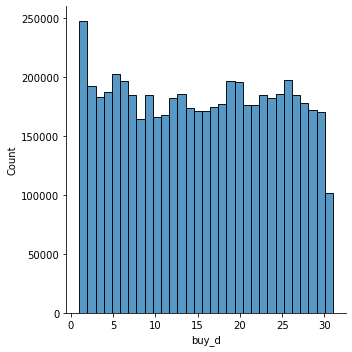

In [177]:
sns.displot(df1['buy_d'],bins=31)

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2479/3751378546.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2479/3751378546.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


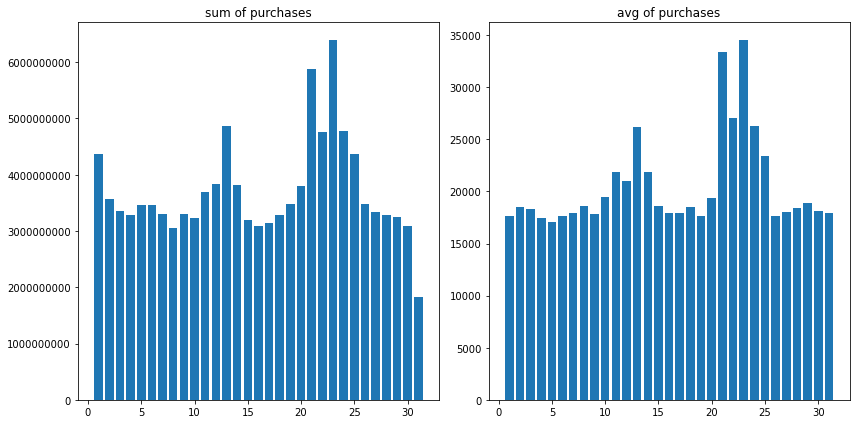

In [178]:
plt.figure(figsize=(12,6),facecolor="white")
plt.subplot(1,2,1)
plt.title("sum of purchases")
plt.bar(df1.groupby('buy_d').sum()['pre'].index,df1.groupby('buy_d').sum()['pre'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.subplot(1,2,2)
plt.title("avg of purchases")
plt.bar(df1.groupby('buy_d').mean()['pre'].index,df1.groupby('buy_d').mean()['pre'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.tight_layout()
plt.show()

In [189]:
# 인당 평균 구매일
a = df1.groupby('id').mean().reset_index()[['id','buy_d']]
def truncs(num):
    return int(num//1)
a['buy_d'] = a['buy_d'].apply(truncs)
a['buy_d'] = a['buy_d'].astype(int)
df3 = df3.merge(a,on='id')

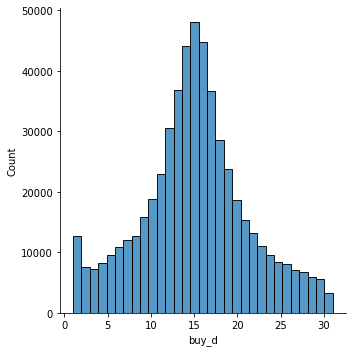

In [196]:
sns.displot(df3['buy_d'],bins=31)

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2479/810107199.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2479/810107199.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


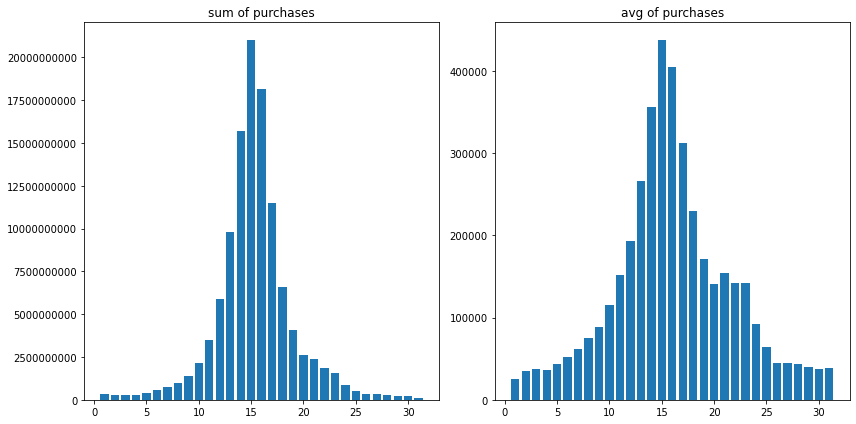

In [197]:
plt.figure(figsize=(12,6),facecolor="white")
plt.subplot(1,2,1)
plt.title("sum of purchases")
plt.bar(df3.groupby('buy_d').sum()['pre'].index,df3.groupby('buy_d').sum()['pre'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.subplot(1,2,2)
plt.title("avg of purchases")
plt.bar(df3.groupby('buy_d').mean()['pre'].index,df3.groupby('buy_d').mean()['pre'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.tight_layout()
plt.show()

## 외국인별, merchant_id 별

##